### 목표
 - 500명의 키와 몸무게, 비만도 라벨(label)을 이용해서 비만도 판단하는 모델


In [8]:
#판다스
#시각화 라이브러리
#knn
#정확도 확인
import pandas as pd

#그래프
import matplotlib.pyplot as plt

#knn 모델
from sklearn.neighbors import KNeighborsClassifier

#정확도
from sklearn import metrics

In [9]:
data=pd.read_csv("data/bmi_500.csv", encoding="euc-kr")
data

Gender  Height  Weight            Label
0      Male     174      96          Obesity
1      Male     189      87           Normal
2    Female     185     110          Obesity
3    Female     195     104       Overweight
4      Male     149      61       Overweight
..      ...     ...     ...              ...
495  Female     150     153  Extreme Obesity
496  Female     184     121          Obesity
497  Female     141     136  Extreme Obesity
498    Male     150      95  Extreme Obesity
499    Male     173     131  Extreme Obesity

[500 rows x 4 columns]

In [10]:
data.head(4)

Gender  Height  Weight       Label
0    Male     174      96     Obesity
1    Male     189      87      Normal
2  Female     185     110     Obesity
3  Female     195     104  Overweight

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Label   500 non-null    object
dtypes: int64(2), object(2)
memory usage: 15.8+ KB


In [12]:
#기술 통계 확인하는 함수
data.describe()

Height      Weight
count  500.000000  500.000000
mean   169.944000  106.000000
std     16.375261   32.382607
min    140.000000   50.000000
25%    156.000000   80.000000
50%    170.500000  106.000000
75%    184.000000  136.000000
max    199.000000  160.000000

In [14]:
data['Label']

0              Obesity
1               Normal
2              Obesity
3           Overweight
4           Overweight
            ...       
495    Extreme Obesity
496            Obesity
497    Extreme Obesity
498    Extreme Obesity
499    Extreme Obesity
Name: Label, Length: 500, dtype: object

In [15]:
#중복없이 값을 출력
data['Label'].unique()

array(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'], dtype=object)

In [28]:
#인덱싱 테스트
#1. Label 열 인덱싱
data[['Label']]

Label
0            Obesity
1             Normal
2            Obesity
3         Overweight
4         Overweight
..               ...
495  Extreme Obesity
496          Obesity
497  Extreme Obesity
498  Extreme Obesity
499  Extreme Obesity

[500 rows x 1 columns]

In [43]:
#2. Label 안에 Normal의 값을 가진 행 데이터 전체 출력
norData=data[data['Label']=="Normal"]
# loc로
data[data.loc[:, 'Label']=='Normal']
# iloc로
data[data.iloc[:, 3]=='Normal']
norData

Gender  Height  Weight   Label
1      Male     189      87  Normal
10     Male     195      81  Normal
13     Male     155      51  Normal
14     Male     191      79  Normal
24   Female     172      67  Normal
..      ...     ...     ...     ...
472  Female     178      65  Normal
477    Male     167      64  Normal
478  Female     151      55  Normal
487    Male     187      80  Normal
490  Female     164      59  Normal

[69 rows x 4 columns]

In [65]:
#3. Label 안에 Normal 의 값을 가진 행의 height 출력
#data[data.Label=='Normal'].Height
nDf=data[data['Label']=="Normal"][['Height', 'Weight']]

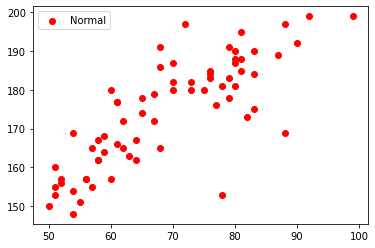

In [66]:
plt.scatter(nDf['Weight'], nDf['Height'], color='red', label='Normal')
plt.legend()
plt.show()

### 각 비만도 등급별 시각화

array(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'], dtype=object) 

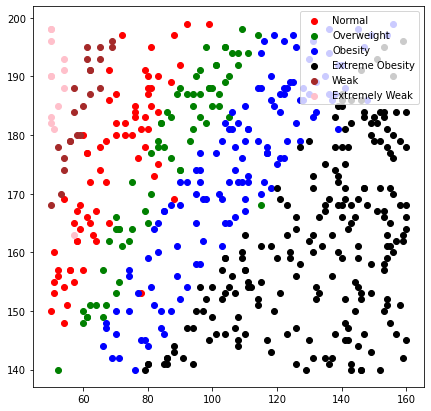

In [85]:
def myScatter(labels, color) :
    a=data[data['Label']==labels]
    plt.scatter(a['Weight'], a['Height'], color=color, label=labels)
    
plt.figure(figsize=(7,7))

myScatter('Normal', 'red')
myScatter('Overweight', 'green')
myScatter('Obesity', 'blue')
myScatter('Extreme Obesity', 'black')
myScatter('Weak', 'brown')
myScatter('Extremely Weak', 'pink')
plt.legend(loc='upper right')
plt.show()

### 모델링
1. 문제와 답으로 분리
2. 훈련셋(데이터세트)과 평가셋으로 분리
3. 모델생성 및 하이퍼파라미터 조정
4. 학습 및 예측, 평가

In [170]:
data
#height, weight -> 문제
#Label -> 답
#문제 X, 답 y 각각의 변수에 담아 주세요!
X=data[['Height','Weight']]
y=data['Label']

In [171]:
print(X.shape)
print(y.shape)

(500, 2)
(500,)


In [172]:
#train., test 데이터 분리

In [173]:
from sklearn.model_selection import train_test_split

In [174]:
#테스트를 위해서 랜덤하게 섞어서 7:3의 개념으로 나눠서 확인해 보기 위함.
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=2)
#X에서 train, test분리
# X_train=X.iloc[:350, :]
# X_test=X.iloc[350:, :]
# y_train=y.iloc[:350]
# y_test=y.iloc[350:]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(350, 2)
(150, 2)
(350,)
(150,)


### 모델링
- knn 객체 생성 & 하이퍼파라미터 지정 n_heighbors(k)
- 학습하기 fit
- 예측하기 predict
- 평가하기 metrics.accuracy_score(실제답(fit), 예측값(predict))
- 어떤 하이퍼 파라미터 일때가 일반화 성능이 좋은지 for 문으로 자동화 시켜서 확인
- 하이퍼파라미터는 물음표의 값 n_neighbors = ?  
- train, test 정확도 그래프 그려보기
- 활용하기

In [175]:
knn_model=KNeighborsClassifier(n_neighbors=1)
knn_model
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [176]:
pre=knn_model.predict(X_test)
metrics.accuracy_score(y_test, pre)

0.8933333333333333

In [177]:
len(pre)

150

In [183]:
train_score_list=[]
test_score_list=[]
for k in range(1, 151, 2) :
    m=KNeighborsClassifier(n_neighbors=k)
    #모델학습
    m.fit(X_train, y_train)
    
    #test
    test_pre=m.predict(X_test)
    test_score=metrics.accuracy_score(y_test, test_pre)
    test_score_list.append(test_score)
    
    #train
    train_pre=m.predict(X_train)
    train_score=metrics.accuracy_score(y_train, train_pre)
    train_score_list.append(train_score)

In [184]:
len(train_score_list)
len(test_score_list)

75

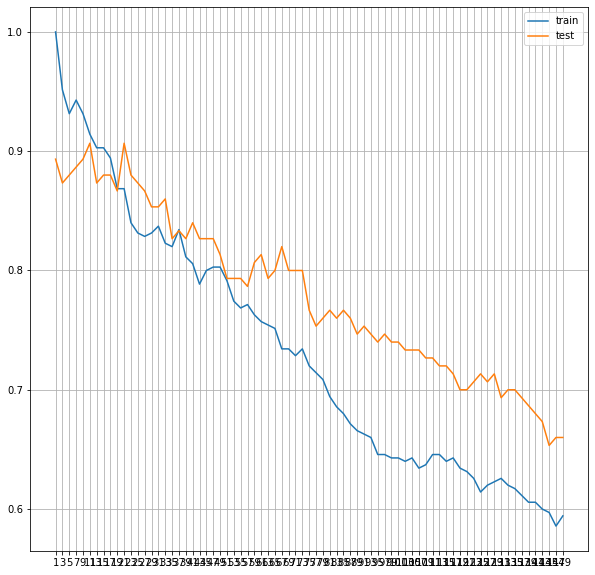

In [185]:
plt.figure(figsize=(10,10))
plt.plot(range(1, 151, 2), train_score_list, label='train')
plt.plot(range(1,151,2), test_score_list, label='test')
#범례 보여주기
plt.legend()
plt.grid()
#x축값 설정
plt.xticks(range(1, 151, 2))
# #limit 걸기
#plt.ylim(0.8, 1)
plt.show()